# ANALISIS E INSIGHTS

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Autocompletado rapido
%config IPCompleter.greedy = True

pd.options.display.max_columns = None

C:\Users\dt_i01626\AppData\Local\Temp\ipykernel_43728\4020996697.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Carga de Datos

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb2.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,level_0,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,index,barrio,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_rosedal
0,0,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.58617,-58.41036,Entire home/apt,32123.0,7,8,161,Palermo,t,2,1.0,1.0,1.0,114,4.77,4.89,4.87,45,Palermo,2917,32123.0,55,01_Una,0-2,0-2,35-687,50,102095.0,1.619848
1,1,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.53892,-58.46599,Private room,24230.0,29,1,0,Nuñez,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN,43,Nuñez,2643,24230.0,100,01_Una,0-2,0-2,0-9,50,92505.0,5.929622
2,2,20429,Rental unit in Buenos Aires · 1 bedroom · 1 be...,77065,Constitucion,-34.62260,-58.38704,Entire home/apt,28268.0,15,1,0,Constitucion,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,8,Constitucion,1650,28268.0,100,01_Una,0-2,0-2,0-9,50,57750.0,6.177485
3,3,24713,Rental unit in Buenos Aires · ★4.66 · 1 bedroo...,100743,San Nicolas,-34.60254,-58.37811,Entire home/apt,32242.0,1,8,78,San Nicolas,t,3,1.0,1.0,2.0,377,4.66,4.90,4.84,10,San Nicolas,1734,32242.0,78,01_Una,3,0-2,35-687,50,60690.0,4.801810
4,4,26258,Rental unit in Buenos Aires · 1 bedroom · 2 be...,111013,Almagro,-34.59997,-58.41238,Entire home/apt,20151.0,7,1,364,Almagro,f,2,1.0,1.0,2.0,2,3.50,5.00,5.00,25,Almagro,1974,20151.0,0,01_Una,0-2,0-2,0-9,50,69090.0,3.099224


## ANALISIS

### Analisis sobre el precio

* ¿Cual es el precio medio? ¿y el rango de precios?¿Y por barrios?

* ¿Cual es el ranking de barrios por precio medio de alquiler?

In [3]:
df.precio_total.describe()

count     20064.000000
mean      26641.017454
std        9170.097383
min       10019.000000
25%       20999.000000
50%       26366.000000
75%       32138.000000
max      394770.600000
Name: precio_total, dtype: float64

In [4]:
df.precio_total.median()

26366.0

In [5]:
df.groupby('neighbourhood').precio_total.mean().sort_values(ascending = False)

neighbourhood
Versalles            36498.600000
Villa Real           30063.750000
Puerto Madero        29402.538462
Palermo              28526.467932
Recoleta             27496.012464
Belgrano             27389.237811
Colegiales           27210.050118
Barracas             27067.424219
Villa Riachuelo      26653.000000
Nuñez                26561.879281
Retiro               26286.826188
Villa Del Parque     26120.002247
Monserrat            26075.461660
San Nicolas          26015.289523
Villa Urquiza        25985.770625
Mataderos            25984.500000
Paternal             25875.244186
Constitucion         25724.675710
Chacarita            25586.514433
San Telmo            25452.595423
Villa Crespo         25309.879245
Parque Chas          25224.371429
Almagro              25061.781510
Parque Chacabuco     24799.881356
Villa Ortuzar        24578.580412
Villa Luro           24556.500000
Agronomia            24373.383333
Caballito            24241.810059
Villa Pueyrredon     24162.166667


In [6]:
df['neighbourhood'].value_counts()

neighbourhood
Palermo              5557
Recoleta             2800
San Nicolas          1384
Belgrano             1124
Monserrat            1072
Retiro                947
Almagro               914
Balvanera             864
Villa Crespo          795
San Telmo             568
Caballito             507
Nuñez                 473
Colegiales            423
Chacarita             388
Villa Urquiza         320
Constitucion          317
Saavedra              170
San Cristobal         153
Barracas              128
Flores                119
Coghlan                99
Villa Ortuzar          97
Villa Del Parque       89
Boca                   78
Boedo                  78
Villa Devoto           71
Parque Chas            63
Parque Patricios       59
Parque Chacabuco       59
Villa Pueyrredon       54
Paternal               43
Agronomia              36
Floresta               35
Villa Santa Rita       32
Villa Gral. Mitre      29
Mataderos              20
Villa Luro             18
Velez Sarsfield        1

**Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos, espectáculos o que esten proximos al aeropuerto internacional Ezeiza.**

Llama la atención el dato de los barrios de **Versalles** y **Villa Real**, vamos a verlo con más detalle. Si bien hay pocos inmuebles en esa zona.

In [7]:
df.loc[df.neighbourhood == 'Versalles'].sort_values('precio_total', ascending = False).head(20)

,level_0,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,index,barrio,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_rosedal
4436,4436,39545948,Home in Versalles · 1 bedroom · 2 beds · 1 pri...,214721175,Versalles,-34.625920,-58.523920,Private room,39874.0,1,2,177,Versalles,f,2,1.0,1.0,2.0,0,NaN,NaN,NaN,18,Versalles,1869,55823.6,51,01_Una,0-2,0-2,0-9,50,65415.0,11.589579
13331,13331,908160335155154607,Home in Buenos Aires · ★4.91 · 4 bedrooms · 4 ...,488832901,Versalles,-34.631744,-58.515576,Private room,16089.0,1,5,255,Versalles,f,8,2.0,2.0,4.0,11,4.91,4.91,4.82,18,Versalles,1869,45049.2,30,02_Dos,4-16,3-17,10-34,70,91581.0,11.308331
2685,2685,28442705,Home in Versalles · 1 bedroom · 1 bed · 1 priv...,214721175,Versalles,-34.625860,-58.525260,Private room,35444.0,1,2,173,Versalles,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,18,Versalles,1869,35444.0,52,01_Una,0-2,0-2,0-9,50,65415.0,11.691483
9306,9306,767604366081843380,Chalet in Buenos Aires · ★5.0 · 1 bedroom · 2 ...,488832901,Versalles,-34.631774,-58.515545,Private room,20916.0,1,5,267,Versalles,f,3,1.0,1.0,2.0,4,5.00,5.00,5.00,18,Versalles,1869,29282.4,26,01_Una,3,0-2,0-9,50,65415.0,11.307984
18181,18181,1024171759431590007,Home in Buenos Aires · ★5.0 · 1 bedroom · 2 be...,488832901,Versalles,-34.631744,-58.515576,Private room,12067.0,1,5,258,Versalles,f,2,1.0,1.0,2.0,3,5.00,5.00,5.00,18,Versalles,1869,16893.8,29,01_Una,0-2,0-2,0-9,50,65415.0,11.308331


In [8]:
df.loc[df.neighbourhood == 'Villa Real'].sort_values('precio_total', ascending = False).head(20)

,level_0,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,index,barrio,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_rosedal
3545,3545,33491242,Home in Ciudadela · ★5.0 · 3 bedrooms · 3 beds...,169391909,Villa Real,-34.624930,-58.530890,Private room,30000.0,1,1,359,Villa Real,f,1,1.0,2.0,3.0,3,5.00,5.0,5.00,14,Villa Real,1779,63000.0,1,02_Dos,0-2,3-17,0-9,70,87171.0,12.087167
11877,11877,868023004161805165,Rental unit in Buenos Aires · 2 bedrooms · 2 b...,248337591,Villa Real,-34.616687,-58.528852,Entire home/apt,24230.0,1,1,0,Villa Real,f,2,1.0,1.0,2.0,0,NaN,NaN,NaN,14,Villa Real,1779,24230.0,100,01_Una,0-2,0-2,0-9,50,62265.0,11.501785
11516,11516,856494346732713007,Rental unit in Buenos Aires · ★4.93 · 1 bedroo...,169563066,Villa Real,-34.621933,-58.528742,Entire home/apt,22525.0,1,2,363,Villa Real,t,3,1.0,1.0,2.0,27,4.93,5.0,4.93,14,Villa Real,1779,22525.0,0,01_Una,3,0-2,10-34,50,62265.0,11.755283
2732,2732,28736634,Home in Villa Real · 1 bedroom · 1 bed · 1 sha...,216756777,Villa Real,-34.616690,-58.527050,Private room,10500.0,1,1,0,Villa Real,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN,14,Villa Real,1779,10500.0,100,01_Una,0-2,0-2,0-9,50,62265.0,11.353180


In [9]:
temp = df.groupby('neighbourhood')[['precio_total', 'precio_compra']].mean()
temp

,precio_total,precio_compra
neighbourhood,,
Agronomia,24373.383333,74352.833333
Almagro,25061.781510,74351.120350
Balvanera,23847.258218,61873.421296
Barracas,27067.424219,74061.695312
Belgrano,27389.237811,99985.060498
Boca,23524.812821,54497.512821
Boedo,21530.444872,70899.230769
Caballito,24241.810059,78824.694280
Chacarita,25586.514433,84204.371134


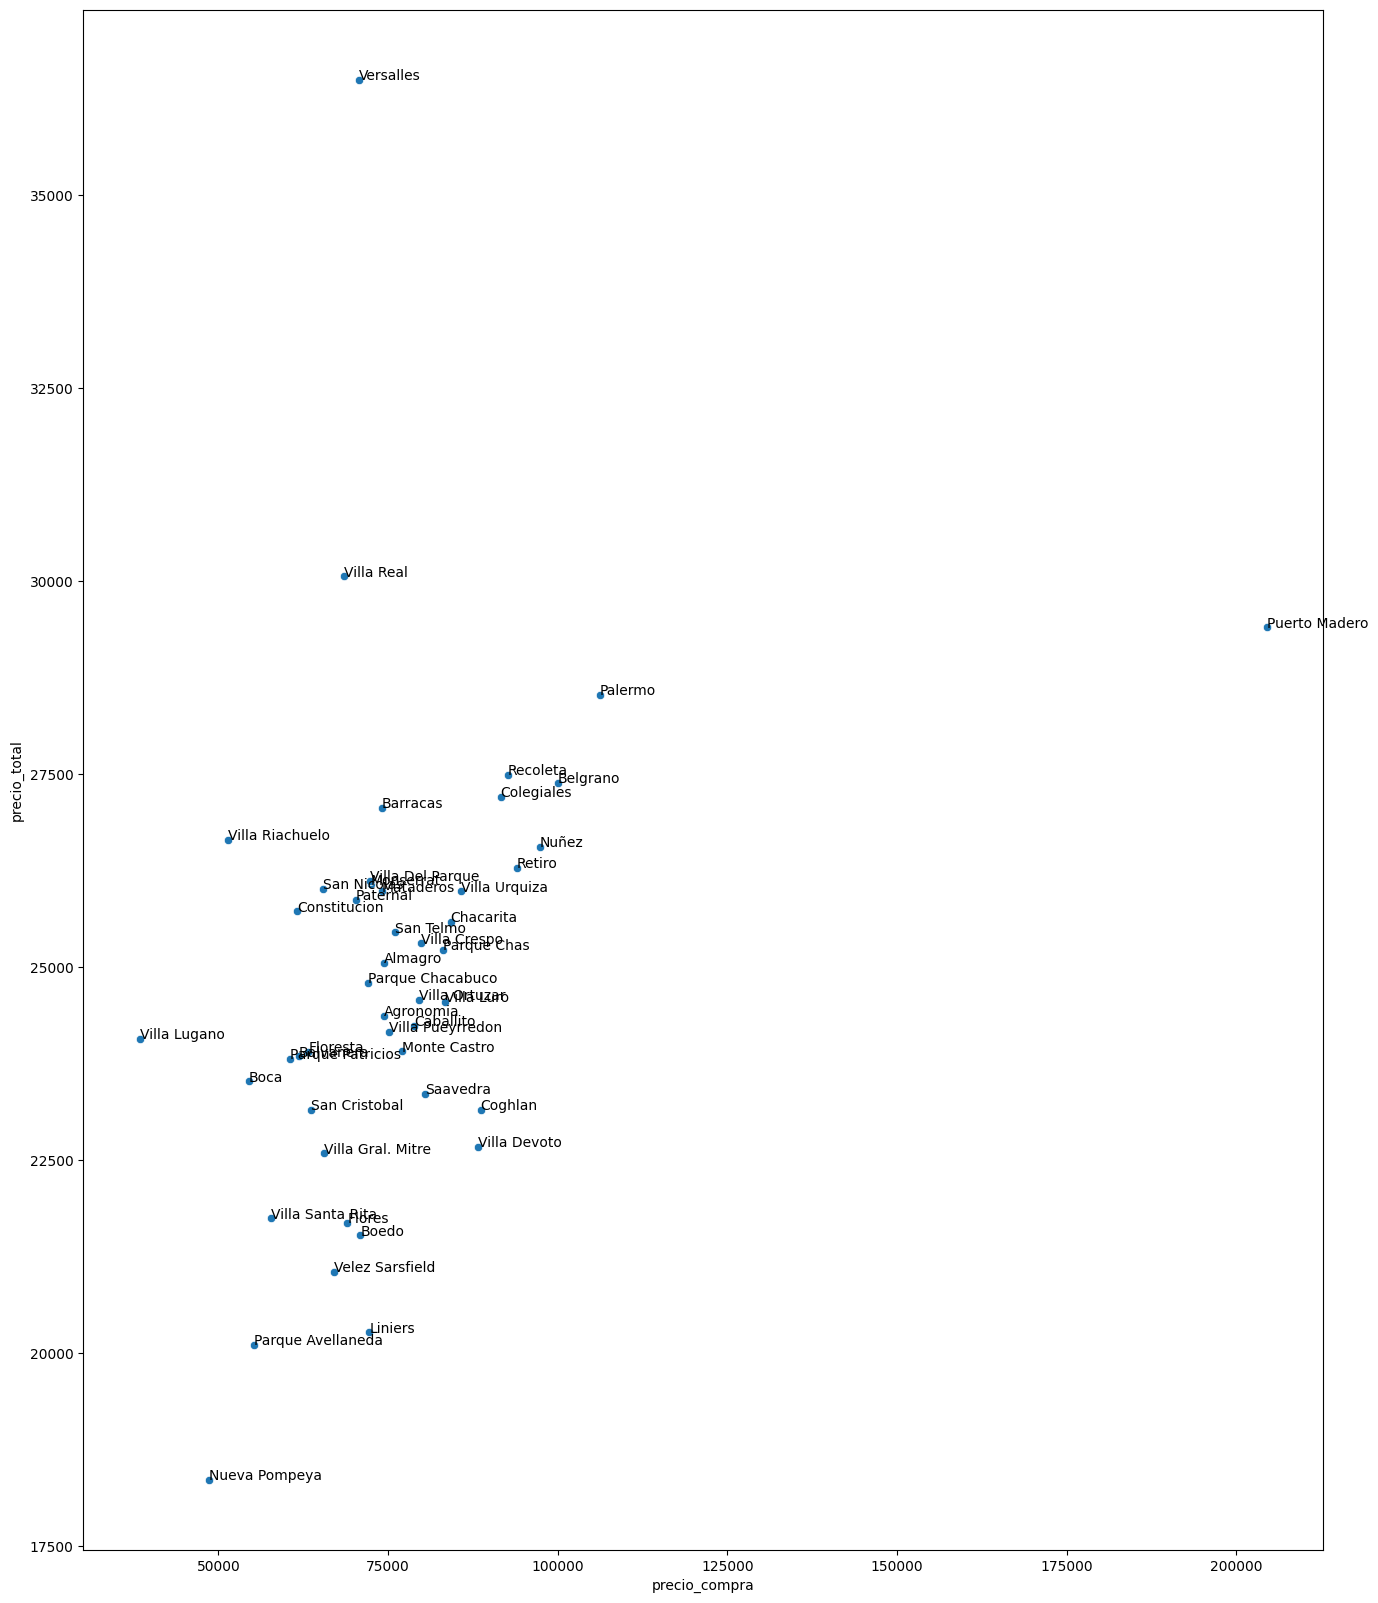

In [10]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')

#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

Hay 5 barrios que sobresalen, **Versalles, Villa Real, Recoleta, Colegiales y Palermo**
Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
* Bajo: Versalles, Villa Real.
* Medio: Recoleta, Colegiales.
* Alto: Palermo.

**Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

**¿Qué factores (a parte de la localización) determinan el precio del alquiler?**

Construcción de minicubo a partir de las variables discretizadas

In [11]:
df.filter(like = 'disc')

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc
0,01_Una,0-2,0-2,35-687
1,01_Una,0-2,0-2,0-9
2,01_Una,0-2,0-2,0-9
3,01_Una,3,0-2,35-687
4,01_Una,0-2,0-2,0-9
...,...,...,...,...
20059,01_Una,0-2,0-2,0-9
20060,01_Una,3,0-2,0-9
20061,01_Una,0-2,0-2,0-9
20062,01_Una,0-2,0-2,0-9


In [12]:
#Paso 1: Seleccionar las variables que serán las metricas y cuales serán las dimensiones
metricas = ['precio_total', 'precio_compra']
dimensiones = ['bedrooms_disc', 'accommodates_disc', 'beds_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,precio_total,precio_compra
0,01_Una,0-2,0-2,32123.0,102095.0
1,01_Una,0-2,0-2,24230.0,92505.0
2,01_Una,0-2,0-2,28268.0,57750.0
3,01_Una,3,0-2,32242.0,60690.0
4,01_Una,0-2,0-2,20151.0,69090.0
...,...,...,...,...,...
20059,01_Una,0-2,0-2,12897.0,56980.0
20060,01_Una,3,0-2,37998.0,87850.0
20061,01_Una,0-2,0-2,18975.0,67970.0
20062,01_Una,0-2,0-2,24182.0,60690.0


In [13]:
#Paso 2: Pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars = ['precio_total', 'precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,32123.0,102095.0,bedrooms_disc,01_Una
1,24230.0,92505.0,bedrooms_disc,01_Una
2,28268.0,57750.0,bedrooms_disc,01_Una
3,32242.0,60690.0,bedrooms_disc,01_Una
4,20151.0,69090.0,bedrooms_disc,01_Una
...,...,...,...,...
60187,12897.0,56980.0,beds_disc,0-2
60188,37998.0,87850.0,beds_disc,0-2
60189,18975.0,67970.0,beds_disc,0-2
60190,24182.0,60690.0,beds_disc,0-2


In [14]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable', 'value'])[['precio_total', 'precio_compra']].agg('mean')
minicubo_precio

precio_total  precio_compra
variable          value                                        
accommodates_disc 0-2               25327.297352   85059.604026
                  3                 27707.738864   87938.913496
                  4-16              30385.336591  100719.881704
bedrooms_disc     01_Una            25895.277118   84261.508677
                  02_Dos            29858.971375  112014.283354
                  03_Tres           36008.904225  142076.091549
                  04_Cuatro o mas  119473.735714  191880.000000
beds_disc         0-2               25895.277118   84261.508677
                  3-17              31639.052207  114940.631478

Sobre el minicubo se analizan cada variable, en busca de generar algún insight.

In [15]:
minicubo_precio.loc['bedrooms_disc']

,precio_total,precio_compra
value,,
01_Una,25895.277118,84261.508677
02_Dos,29858.971375,112014.283354
03_Tres,36008.904225,142076.091549
04_Cuatro o mas,119473.735714,191880.000000


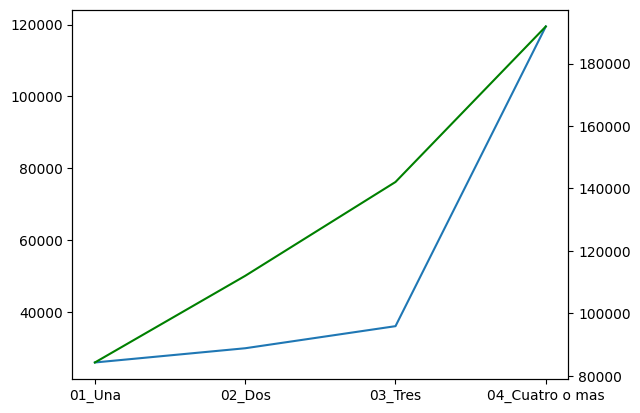

In [16]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra, color = 'green');

En cuanto al número de cuartos, se puede concluir:

**Insight 3: Se presenta una mejor relación de inversión, rendimiento. En los departamentos de la caracteristicas tipo: monoambiente, loft o con una habitación. O de 4 ó más habitaciones** 

In [17]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
0-2,25895.277118,84261.508677
3-17,31639.052207,114940.631478


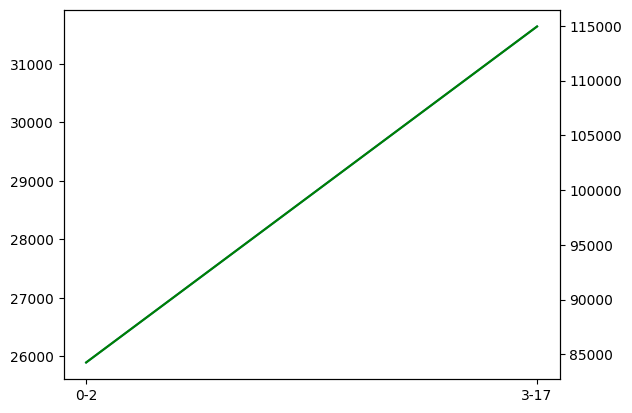

In [18]:
f,ax=plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra, color = 'green');

En cuanto al número de camas no hay nada que destacar. Quizás se podría reveer la segmentación para discretizar pero no aportaria mucho más datos, que los obtenidos por el número de habitaciones.

In [19]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0-2,25327.297352,85059.604026
3,27707.738864,87938.913496
4-16,30385.336591,100719.881704


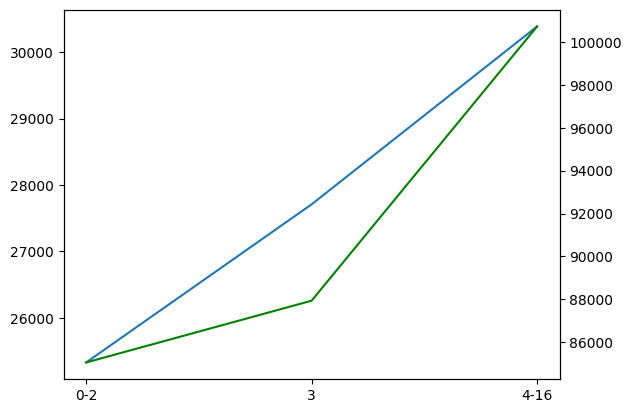

In [20]:
f,ax=plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra, color = 'green');

**Insight 4: la cantidad óptimo de huéspedes está en 3, ya que se observa una mejor relación beneficio - huspedes.A partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante.**

Por último se analiza la variable que hemos construído de cercanía al rosedal, para ver si tiene efecto sobre el precio de las habitaciones.

In [21]:
df.groupby('neighbourhood').pdi_rosedal.mean().sort_values()

neighbourhood
Palermo               1.903164
Recoleta              2.664869
Colegiales            3.140253
Chacarita             3.426625
Villa Crespo          3.534055
Almagro               3.746192
Belgrano              3.947448
Balvanera             4.025733
Retiro                4.125355
San Nicolas           4.633710
Villa Ortuzar         5.021764
Nuñez                 5.149630
Caballito             5.431717
Coghlan               5.446074
Paternal              5.531022
Monserrat             5.627970
Parque Chas           5.737269
San Cristobal         5.747780
Boedo                 6.033760
Villa Gral. Mitre     6.278648
Constitucion          6.294044
Saavedra              6.430185
Villa Urquiza         6.431215
San Telmo             6.613738
Parque Patricios      6.952869
Puerto Madero         7.056019
Parque Chacabuco      7.109320
Agronomia             7.307978
Flores                7.414495
Villa Del Parque      7.422379
Villa Santa Rita      7.590719
Barracas              7.8

Se selecciona los 7 primeros porque estan en un radio de los 4 kilometros.

In [22]:
seleccion = df.groupby('neighbourhood').pdi_rosedal.mean().sort_values()[0:7].index.to_list()
seleccion

['Palermo',
 'Recoleta',
 'Colegiales',
 'Chacarita',
 'Villa Crespo',
 'Almagro',
 'Belgrano']

<Axes: xlabel='pdi_rosedal', ylabel='precio_total'>

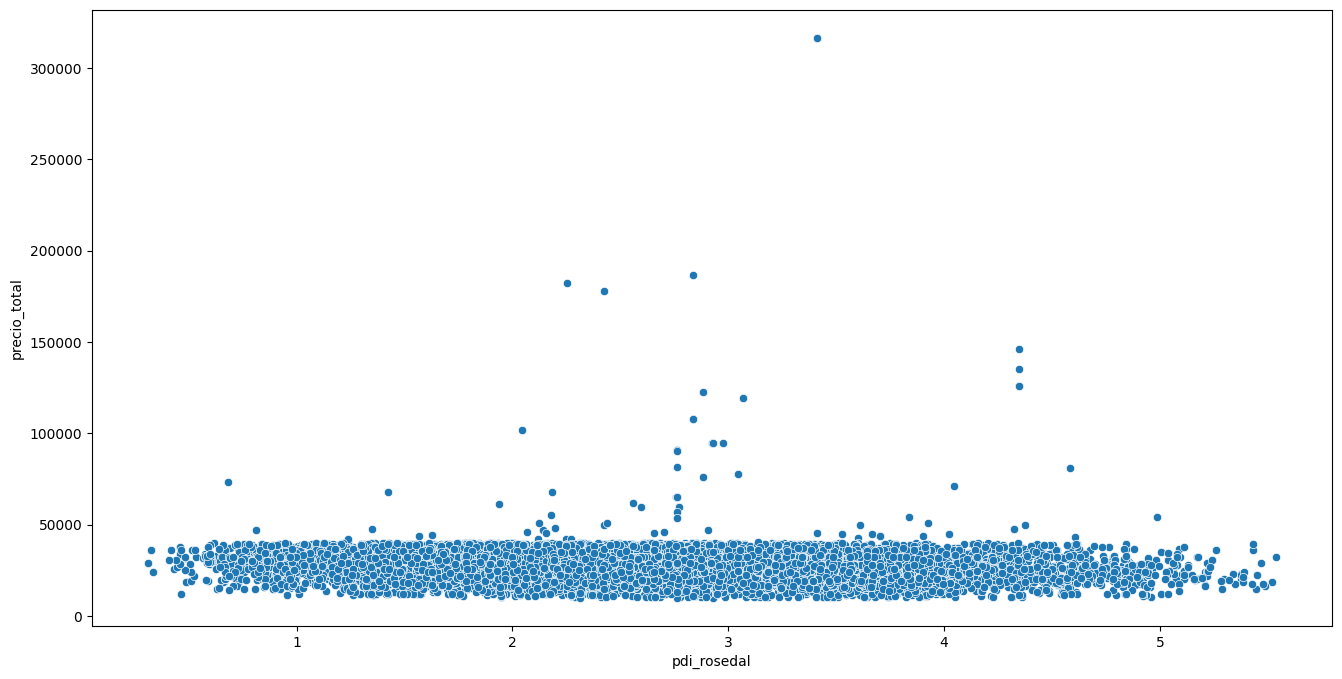

In [23]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = df.loc[df.neighbourhood.isin(seleccion)], x = 'pdi_rosedal', y = 'precio_total')

**Insight 5: en un radio de 4 kilometros al parecer, la cercanía al rosedal no tiene tanto impacto como sería esperable.**

### Analisis sobre la ocupación

...(completar)...

### Analisis geográfico sobre un mapa

In [24]:
import folium

lat1 = -34.57222
lon1 = -58.41544

In [25]:
folium.Map(location = [-34.57222, -58.41544], zoom_start = 14)

In [30]:
datos = df.loc[df['neighbourhood'] == 'Palermo'].head(10).copy()

In [31]:
mapa = folium.Map(location = [-34.57222, -58.41544], zoom_start = 14)

for piso in range(0, len(datos)):
    folium.Marker(
        location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
        popup = datos.iloc[piso]['precio_total'],
    ).add_to(mapa)

mapa

In [32]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [35]:
mapa = folium.Map(location = [-34.57222, -58.41544], zoom_start = 14)

In [36]:
for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

In [34]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12001 entries, 0 to 20060
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         12001 non-null  int64  
 1   id                              12001 non-null  int64  
 2   name                            12001 non-null  object 
 3   host_id                         12001 non-null  int64  
 4   neighbourhood                   12001 non-null  object 
 5   latitude                        12001 non-null  float64
 6   longitude                       12001 non-null  float64
 7   room_type                       12001 non-null  object 
 8   price                           12001 non-null  float64
 9   minimum_nights                  12001 non-null  int64  
 10  calculated_host_listings_count  12001 non-null  int64  
 11  availability_365                12001 non-null  int64  
 12  neighbourhood_cleansed          12001